#Monte Carlo

In [ ]:
import numpy as np #libraries
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(-3,3,100) #create a range of x values for our function

In [ ]:
y = x**2 + 2 #make a parabolic function

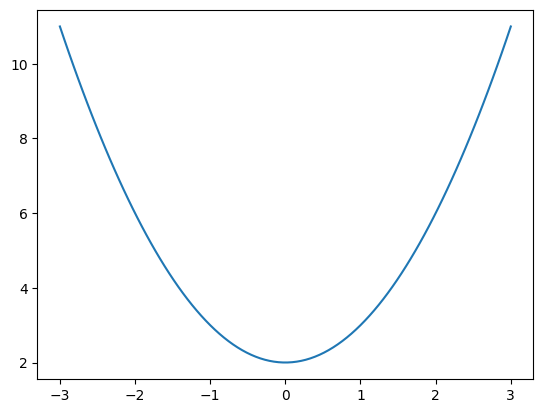

In [ ]:
plt.plot(x,y) #plot it

$f(x) = x^2 + 2$

$Area = \int_a^bf(x) dx$

$= \int_a^b (x^2+2) dx$

$= \left.\frac{x^3}{3}+2x\right\vert_1^2$

$= (\frac{8}{3}+4) - (\frac{1}{3}+2)$

$= \frac{13}{3}$

In [ ]:
13/3 #this is the result of integrating the function between the values of 1 and 2

4.333333333333333

To integrate the function $f(x)$ over the interval $[a,b]$ we

[1] find some value $M$ such that $f(x) < M$ over the interval $[a,b]$

[2] select a random number $x$ from a uniform distribution over the interval $[a,b]$

[3] select a random number y from a uniform distribution over the interval $[0,M]$

[4] determine if $y > f(x)$ or $y ≤ f(x)$

[5] repeat this process $N$ times, keeping track of the number of times $y ≤ f(x)$ or under the curve, successes $S$.

The estimated probability of success is then:

$\frac{S}{N}=\frac{\text{Area under curve}}{\text{Total area inside rectangle}} = \frac{\int_a^bf(x)dx}{M(b-a)}$

$\int_a^bf(x)dx = M(b-a)\frac{S}{N}$

In [ ]:
def f(x): #now we save our function as a function in our code, so we can use it against multiple ranges or variables
    y = x**2 + 2
    return y

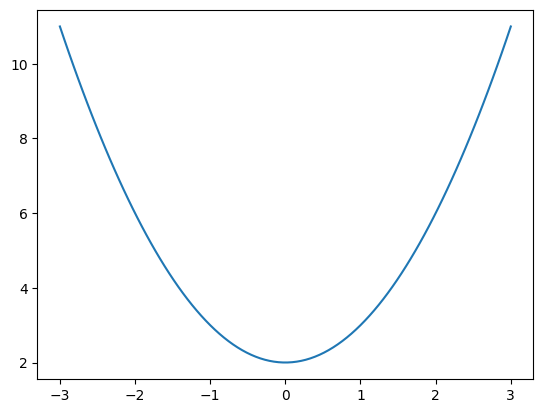

In [ ]:
plt.plot(x,f(x)) #the same graph as x,y but more variable data can be used in the function form of this

In [ ]:
M = 10 #M will be our Maximum value that the curve will be beneath.  This M must be greater than the greatest y value in the range of x's we choose

In [ ]:
a = 1 #a will be the first endpoint of our range and b the second
b = 2

In [ ]:
x = a + (b-a)*np.random.random() #now we generate a random number between b and a by getting a random number between zero and one, multiplying it by the difference and adding the smaller endpoint

In [ ]:
x #this returns us this value

1.6282970908581413

In [ ]:
y = M*np.random.random() #for our x, we will multiply M (the maximum of our range) by a different random value to get us the y coordinate

In [ ]:
x,y,f(x) #by doing this we have a point that we can now check whether it is under the curve or not.  We do x and see if f(x) or y is bigger.  If f(x) is bigger the point is beneath our curve

(1.6282970908581413, 3.4824152045119963, 4.651351416097086)

In [ ]:
y < f(x) #we check which is greater

True

In [ ]:
N = 100_000 #now we make a for loop to iterate this many times.  100000, to be specific
S = 0 #S will be our running tally, which will approach the area under the curve, aka the integral of f(x) between our two endpoints a and b
for i in range(N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

M*(b-a)*(S/N)

4.3147

In [ ]:
def f(x):
    y = x**2 + 2
    return y

In [ ]:
def monte_carlo_integrate(f,a,b,N): #now we make a function to do the whole thing, which intakes as arguments our f function, our min a, our max b, and our number of data points N

    N = 10000000
    S = 0
    for i in range(N):

        x = a + (b-a)*np.random.random()
        y = M*np.random.random()

        S += (y < f(x))

    return M*(b-a)*(S/N)

In [ ]:
monte_carlo_integrate(f,1,2,1000) #The higher N goes the closer we approach 4.3333333333 or 13/3, which is the value of the integral

4.332507

In [ ]:
from sympy import * #this is the library of symbolic python, which allows us to do operations on symbols, which is a custom data type made using classes

In [ ]:
x = Symbol('x') #create a variable x

In [ ]:
x

x

In [ ]:
integrate(x**2 + 2, (x,1,2)) #now we can do definite integrals, even when we never specify the value of x, first input is our function to integrate.  Second input is a tuple which contains the variable we want to integrate with respect to , as well as our min and max values

13/3

In [ ]:
13/3

4.333333333333333

In [ ]:
integrate(x**3 + 3, (x,1,2)) #with a new function we see we can integrate over the same x values and get a different result

27/4

In [ ]:
27/4

6.75

In [ ]:
x = 0

In [ ]:
def f(x): #create a function permanently defining our function
    y = x**3 + 3
    return y

In [ ]:
monte_carlo_integrate(f,1,2,1000) #now we use the previously made function to try to integrate using the random points within area method

6.707821000000001

In [ ]:
N = 2000
S = 0
Z = np.zeros(N,) #we simulate the monte carlo method of integration again
for i in range(1,N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

    Z[i] = M*(b-a)*(S/i)

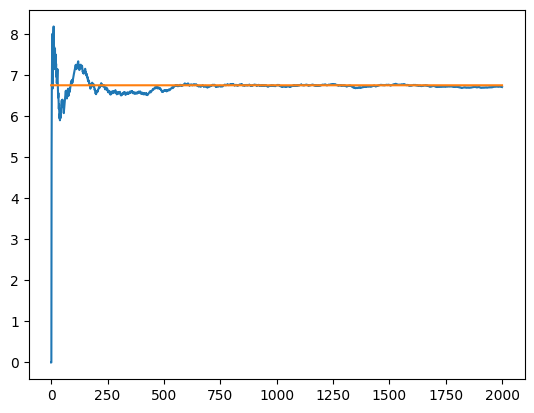

In [ ]:
plt.plot(Z) #we can see that as we increase N, Z becomes more and more accurate
plt.plot(6.75*np.ones(Z.shape))

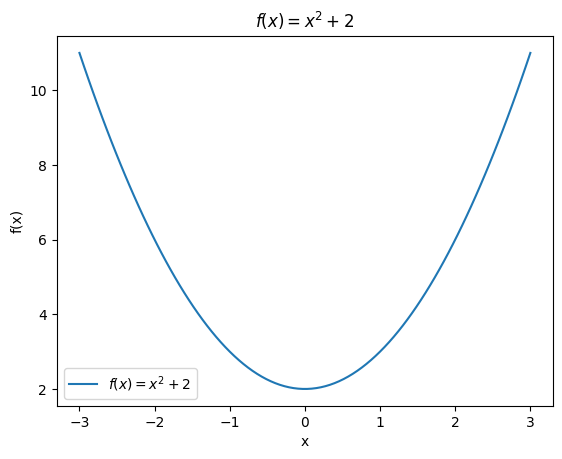

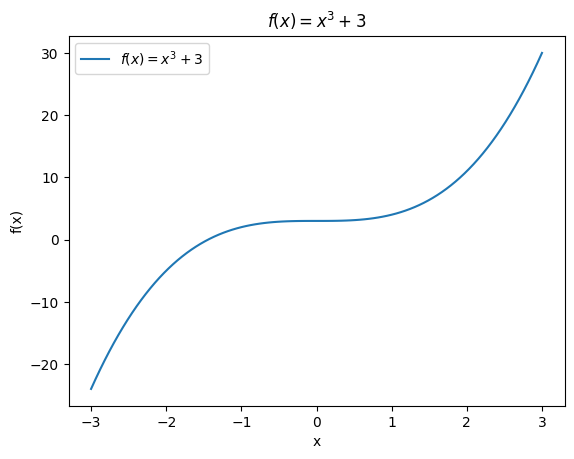

Exact Area under f1: 4.33333333333333
Estimated Area under f1: 4.383
Exact Area under f2: 6.75000000000000
Estimated Area under f2: 6.75122


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate

# Define a general function for Monte Carlo integration
def monte_carlo_integrate(func, a, b, N, M): #we refine our function by allowing a variable maximum to be input
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Define the functions to be integrated
def f1(x):
    return x**2 + 2

def f2(x):
    return x**3 + 3

# Calculate exact and estimated areas
def calculate_areas(func, a, b, N, M):
    x_sym = Symbol('x')
    exact_area = integrate(func(x_sym), (x_sym, a, b)).evalf() #we make a function which will integrate using the sympy library and one which will integrate using the monte carlo method
    estimated_area = monte_carlo_integrate(func, a, b, N, M)
    return exact_area, estimated_area #we return both values so we can compare them

# Plotting function
def plot_function(func, title, a=-3, b=3): #we make a function for more streamlined matplotlib graphing
    x = np.linspace(a, b, 100)
    y = func(x)
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

# Plot the functions
plot_function(f1, "$f(x) = x^2 + 2$") #and use it on both our functions
plot_function(f2, "$f(x) = x^3 + 3$")

# Calculate and print areas
exact_area_f1, estimated_area_f1 = calculate_areas(f1, 1, 2, 100000, 20) #save the results in the variables
exact_area_f2, estimated_area_f2 = calculate_areas(f2, 1, 2, 1000000, 20)

print("Exact Area under f1:", exact_area_f1)
print("Estimated Area under f1:", estimated_area_f1) #print our results below the graph
print("Exact Area under f2:", exact_area_f2)
print("Estimated Area under f2:", estimated_area_f2)


# Visualization

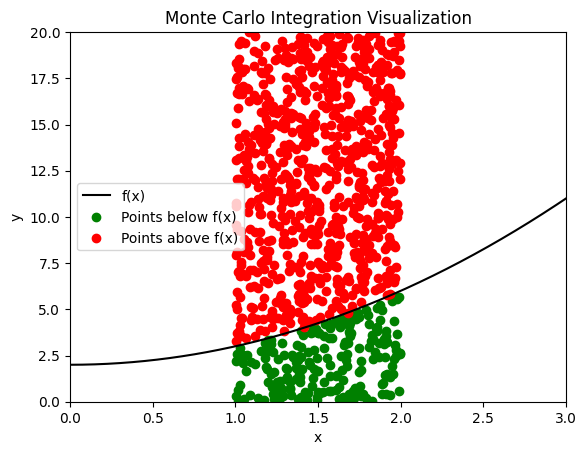

In [ ]:
# Function to plot points for Monte Carlo integration
def plot_monte_carlo(func, a, b, M, N):
    x_points = a + (b - a) * np.random.random(N)
    y_points = M * np.random.random(N)
    below = y_points < func(x_points)
    above = np.invert(below)

    # Plotting the function
    x = np.linspace(a - 1, b + 1, 400)
    y = func(x)
    plt.plot(x, y, label="f(x)", color='black')

    # Plotting the points
    plt.scatter(x_points[below], y_points[below], color='green', label='Points below f(x)')
    plt.scatter(x_points[above], y_points[above], color='red', label='Points above f(x)')

    # Setting up the plot limits and labels
    plt.xlim(a - 1, b + 1)
    plt.ylim(0, M)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Monte Carlo Integration Visualization")
    plt.legend()

    plt.show()

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters for Monte Carlo Integration
a, b, M, N = 1, 2, 20, 1000

# Plotting the Monte Carlo Integration
plot_monte_carlo(f, a, b, M, N)

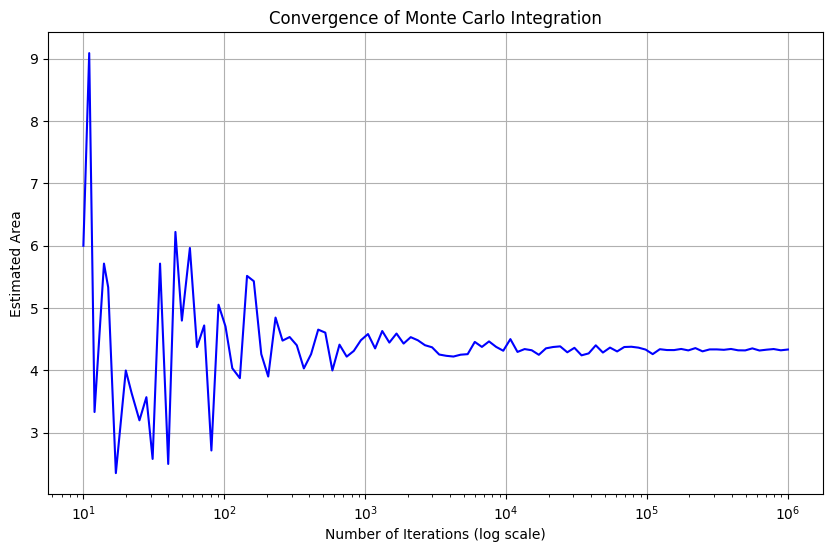

In [ ]:
# Function for Monte Carlo Integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters
a, b, M = 1, 2, 20
iterations = np.logspace(1, 6, 100, dtype=int)  # Using logarithmically spaced iterations for smoother curve
estimated_areas = []

# Calculate estimated areas for different numbers of iterations
for N in iterations:
    estimated_area = monte_carlo_integrate(f, a, b, N, M)
    estimated_areas.append(estimated_area)

# Plotting convergence
plt.figure(figsize=(10, 6))
plt.plot(iterations, estimated_areas, color='blue')
plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Estimated Area')
plt.title('Convergence of Monte Carlo Integration')
plt.grid(True)
plt.show()